## Overview
This notebook is a step by step to calculate the degrees from semi-circular trajectory data

### Steps
1. grab the first point in the trajectory data 720 615 #(964, 480)
2. reverse the datapoints
2. grab the last point in the trajectory data and loop through every trial
3. convert the origin 720 615 to (0,0) - which will give you an updated coordinate
4. using this updated coordinate, transfor it to polar coordinates, which will give you the degree of the data point


load data

- add subject number
- extract relevant columns
- concat data, axis 0
- average degree

### libraries

In [2]:
%matplotlib inline

import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import loggamma
from scipy.stats import johnsonsu
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.stats import frechet_l
from scipy.special import gamma as gammaf
import warnings
import scipy.stats as st
import statsmodels as sm
import seaborn as sns

### seaborn style

In [3]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### function - cartesian to polar coordinates  

In [4]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

### helpful resources
distribution fitting:
    https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
seaborn: 
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

# [ Cognitive ]

### load data and calculate polar coord

In [5]:
sublist = [ 95,96, 97, 99]
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'

df = pd.DataFrame()
result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + \
                    '_task-cognitive_meta_beh.csv'
    df = pd.read_csv(loadfilename, 
                     usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0, sort = True)

In [6]:
# step 3 - subtract mid point ________________________________________________________________________

result['new_ptb_coord_x'] = abs(result['ptb_coord_x'] - 720)
result['new_ptb_coord_y'] = abs(result['ptb_coord_y'] - 615)

result['r'], result['theta'] = cart2pol(result['new_ptb_coord_x'], result['new_ptb_coord_y'])

In [7]:
result.head()

,administer,cue_type,image_filename,match,p5_responseKey,ptb_coord_x,ptb_coord_y,sub_num,new_ptb_coord_x,new_ptb_coord_y,r,theta
0,50,low,13_50_R.jpg,different,1,482.917969,556.742188,95,237.082031,58.257812,244.134926,0.240954
1,150,low,13_150.jpg,same,2,509.277344,515.730469,95,210.722656,99.269531,232.934492,0.440254
2,50,low,1_50_R.jpg,different,1,476.792969,580.289062,95,243.207031,34.710938,245.671547,0.141764
3,150,high,25_150.jpg,same,2,518.460938,484.882812,95,201.539062,130.117188,239.892635,0.573288
4,150,low,6_150_R.jpg,different,2,483.609375,538.406250,95,236.390625,76.593750,248.489698,0.313339


### REMOVE plot original attempt

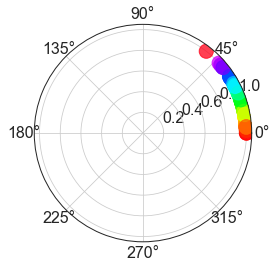

In [8]:
# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)
area = 200 * result['newr']**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(result['theta'], result['newr'], c=colors, s=area, cmap='hsv', alpha=0.75)

## cognitive - plot raw form

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale')

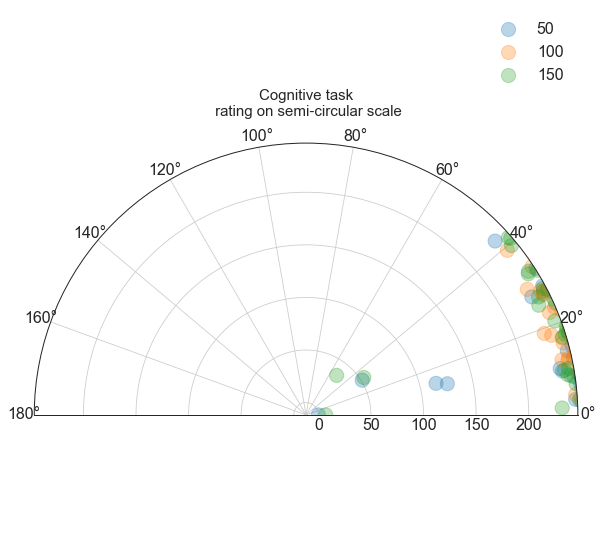

In [9]:

colors = result['theta']

# area = 200 * result['newr']**2
area = 200 * result['newr']**2

groups = result.groupby('administer')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Cognitive task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)
#  marker='o', linestyle='', ms=12,

## cognitive - plot by mental rotation degrees

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale per degree')

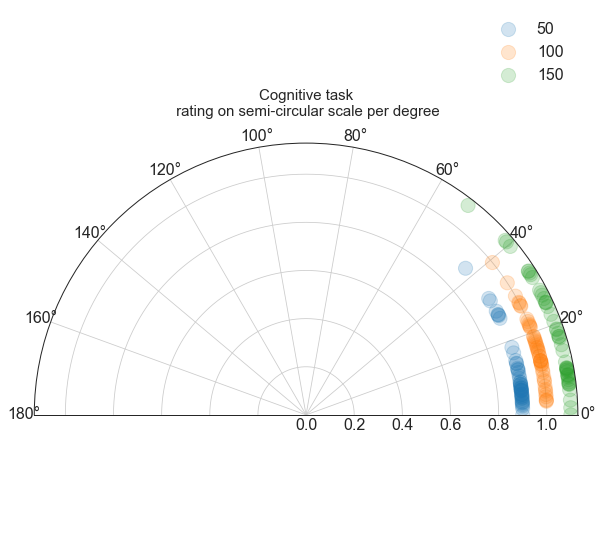

In [10]:

# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)

area = 200 * result['newr']**2

# groups = result.groupby('administer')
group50 = result[result['administer'] ==50]
group100 = result[result['administer'] ==100]
group150 = result[result['administer'] ==150]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*0.9,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group100.theta, np.ones(group100.newr.shape),label=100, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group150.theta, np.ones(group150.newr.shape)*1.1,label=150, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "Cognitive task\n rating on semi-circular scale per degree"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


## participant mean

In [11]:
group_mean = result.groupby(['administer','sub_num']).mean().reset_index()

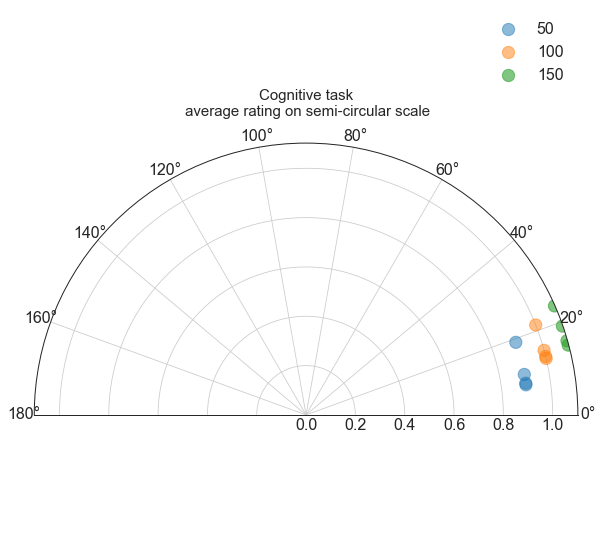

In [12]:


# Compute areas and colors

colors = group_mean['theta']
group_mean['newr'] = np.ones(group_mean.r.shape)
# area = 200 * result['newr']**2
area = 150 * group_mean['newr']**2


# groups = group_mean.groupby('administer')

group_mean_50 = group_mean[group_mean['administer'] ==50]
group_mean_100 = group_mean[group_mean['administer'] ==100]
group_mean_150 = group_mean[group_mean['administer'] ==150]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
# for name, group in groups:
#     ax.scatter(group.theta, group.newr_random,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# ax.legend()
#  marker='o', linestyle='', ms=12,
figure_title = "Cognitive task\n average rating on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


p50 = ax.scatter(group_mean_50.theta, np.ones(group_mean_50.newr.shape)*0.9,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group_mean_100.theta, np.ones(group_mean_100.newr.shape),label=100, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group_mean_150.theta, np.ones(group_mean_150.newr.shape)*1.1,label=150, alpha=0.60, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

## Cognitive RT

In [13]:
sublist = [ 95,96, 97, 99]
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'

df = pd.DataFrame()
result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + \
                    '_task-cognitive_meta_beh.csv'
    df = pd.read_csv(loadfilename, 
                     usecols=['image_filename','administer','match','p5_responseKey','p6_decisionRT','cue_type','ptb_coord_x','ptb_coord_y'])
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0, sort = True)

In [14]:
group_mean = result.groupby(['administer','sub_num']).mean().reset_index()

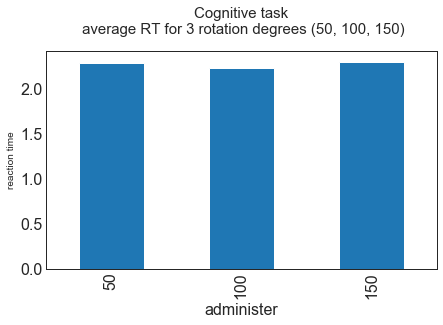

In [15]:
fig, ax = plt.subplots(figsize=(7,4))
figure_title = "Cognitive task\n average RT for 3 rotation degrees (50, 100, 150)"
plt.text(0.5, 1.08, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)
plt.ylabel('reaction time', size = 10)
group_mean.groupby(['administer']).mean()['p6_decisionRT'].plot.bar(ax = ax) #(x = 'administer', y = 'p6_decisionRT', rot = 0)

# [ Pain ]

### load combined data

In [16]:
sublist = [95, 96, 97, 99]
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
# metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-pain_meta_beh.csv'

pain_result = pd.DataFrame()
# pain_result = pd.read_csv(metafilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
# pain_result['sub_num'] = 95



for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-pain_meta_beh.csv'
    df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
    df['sub_num'] = sub
    pain_result = pd.concat([pain_result, df], axis = 0, sort = True)

    # step 3
pain_result['new_ptb_coord_x'] = abs(pain_result['ptb_coord_x'] - 720)
pain_result['new_ptb_coord_y'] = abs(pain_result['ptb_coord_y'] - 615)


In [17]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

r, theta= cart2pol(pain_result['new_ptb_coord_x'],pain_result['new_ptb_coord_y'])

pain_result['theta'] = theta
pain_result['r'] = r

## pain raw form

Text(0.5, 0.8, 'Pain - raw form rating')

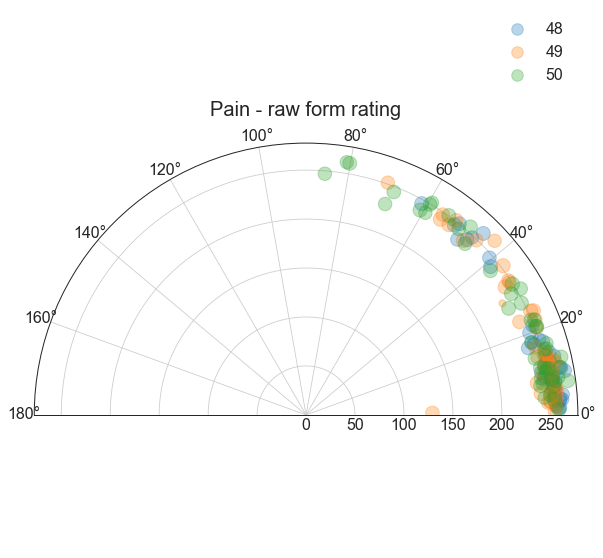

In [18]:
colors = pain_result['theta']
area = 0.003 * pain_result['r']**2
groups = pain_result.groupby('administer')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Pain - raw form rating"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)

## Pain - grouped into temperatures 

Text(0.5, 0.8, 'Pain - rating on semi-circle')

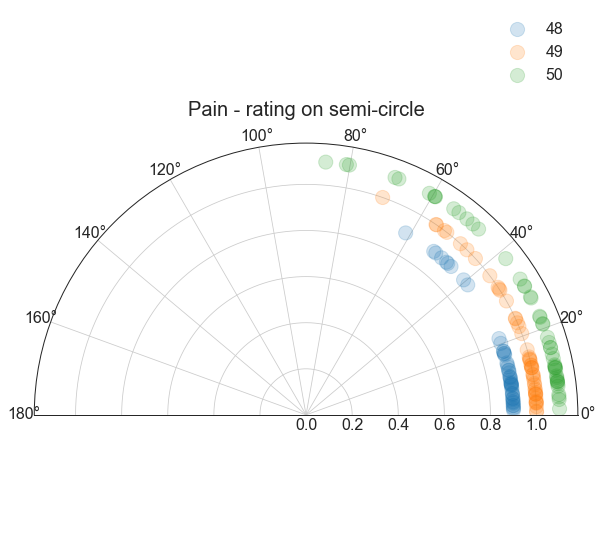

In [25]:

# Compute areas and colors

colors = pain_result['theta']
pain_result['newr'] = np.ones(pain_result.r.shape)

area = 200 * pain_result['newr']**2

# groups = result.groupby('administer')
group48 = pain_result[pain_result['administer'] ==48]
group49 = pain_result[pain_result['administer'] ==49]
group50 = pain_result[pain_result['administer'] ==50]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

# for name, group in groups:
#     ax.scatter(group.theta, np.ones(group.newr_random.shape),label=name, alpha=0.10, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p48 = ax.scatter(group48.theta, np.ones(group48.newr.shape)*0.9,label=48, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p49 = ax.scatter(group49.theta, np.ones(group49.newr.shape),label=49, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*1.1,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

figure_title = "Pain - rating on semi-circle"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)

# [ Vicarious ] 

### load data

In [49]:
sublist = [95,96,97,99]
v_result = pd.DataFrame()
df = pd.DataFrame()
# FIRST IMPORT (CREATE RESULT DATA FRAME)
# main_dir = '/Users/h/Documents/projects_local/social_influence'
# metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-vicarious_meta_beh.csv'

for ind,sub in enumerate(sublist):
    for ver in range(1,3):
        loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-vicarious_' + str(ver) + '_meta_beh.csv'
        df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
        df['sub_num'] = sub
        v_result = pd.concat([v_result, df], axis = 0, sort = False)

    # step 3
v_result['new_ptb_coord_x'] = abs(v_result['ptb_coord_x'] - 720)
v_result['new_ptb_coord_y'] = abs(v_result['ptb_coord_y'] - 615)

v_result['r'], v_result['theta'] = cart2pol(v_result['new_ptb_coord_x'], v_result['new_ptb_coord_y'])



## vicarious - plot raw rating 

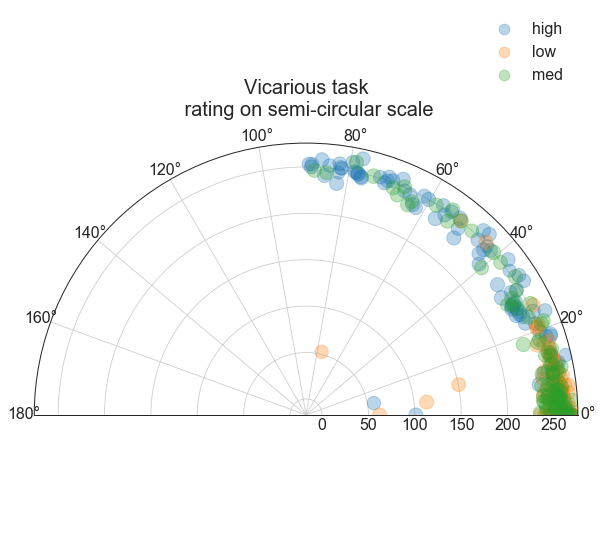

In [27]:

colors = v_result['theta']
area = 0.003 * v_result['r']**2
# area = 0.004 * v_result['newr_random']**2

groups = v_result.groupby('administer')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

figure_title = "Vicarious task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)
ax.legend()
#  marker='o', linestyle='', ms=12,

## vicarious - plot by video levels high/med/low

Text(0.5, 0.8, 'vicarious pain - rating on semi-circle')

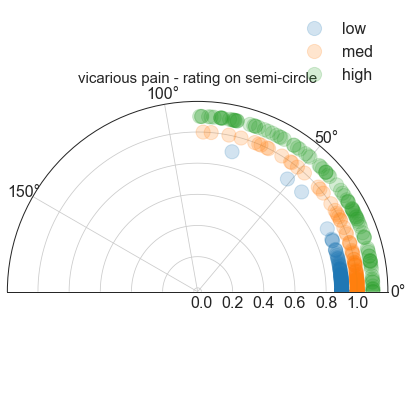

In [28]:

# Compute areas and colors

colors = v_result['theta']
v_result['newr'] = np.ones(v_result.r.shape)

area = 200 * v_result['newr']**2

# groups = result.groupby('administer')
groupl = v_result[v_result['administer'] =='low']
groupm = v_result[v_result['administer'] =='med']
grouph = v_result[v_result['administer'] =='high']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

# for name, group in groups:
#     ax.scatter(group.theta, np.ones(group.newr_random.shape),label=name, alpha=0.10, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
pl = ax.scatter(groupl.theta, np.ones(groupl.newr.shape)*0.9,label='low', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
pm = ax.scatter(groupm.theta, np.ones(groupm.newr.shape),label='med', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ph = ax.scatter(grouph.theta, np.ones(grouph.newr.shape)*1.1,label='high', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

figure_title = "vicarious pain - rating on semi-circle"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

# [ fitting beta distribution ]

This section is devoted to fitting distributions to the rating scale data <br>
Python, specifically scipy has a set of distributions. <br>
The function below goes through every possible distribution and finds the best fit.<br>

## Python (scipy) provides 89 distributions
    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
http://danielhnyk.cz/fitting-distribution-histogram-using-python/

## function - best fit distribution

useful: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [19]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

## best fitting distribution - data combined across 3 tasks

### load data

In [20]:
# cognitive ______________________________________________________________________
sublist = [ 95,96, 97, 99]
main_dir = '/Users/h/Documents/projects_local/social_influence'
cog_df = pd.DataFrame()
cog_result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + \
                    '_task-cognitive_meta_beh.csv'
    cog_df = pd.read_csv(loadfilename, 
                     usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
    cog_df['sub_num'] = sub
    cog_result = pd.concat([cog_result, cog_df], axis = 0, sort = True)
    
# pain _____________________________________________________________________________
sublist = [95, 96, 97, 99]
pain_df = pd.DataFrame()
pain_result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-pain_meta_beh.csv'
    pain_df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
    pain_df['sub_num'] = sub
    pain_result = pd.concat([pain_result, pain_df], axis = 0, sort = True)

# vicarious _____________________________________________________________________________
sublist = [95,96,97,99]
v_result = pd.DataFrame()
v_df = pd.DataFrame()

for ind,sub in enumerate(sublist):
    for ver in range(1,3):
        loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-vicarious_' + str(ver) + '_meta_beh.csv'
        v_df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
        v_df['sub_num'] = sub
        v_result = pd.concat([v_result, v_df], axis = 0, sort = False)

# concat all dataframes
combined = pd.concat([cog_result,pain_result,v_result], axis = 0, sort = False)

combined['new_ptb_coord_x'] = abs(combined['ptb_coord_x'] - 720)
combined['new_ptb_coord_y'] = abs(combined['ptb_coord_y'] - 615)

combined['r'], combined['theta'] = cart2pol(combined['new_ptb_coord_x'], combined['new_ptb_coord_y'])



/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

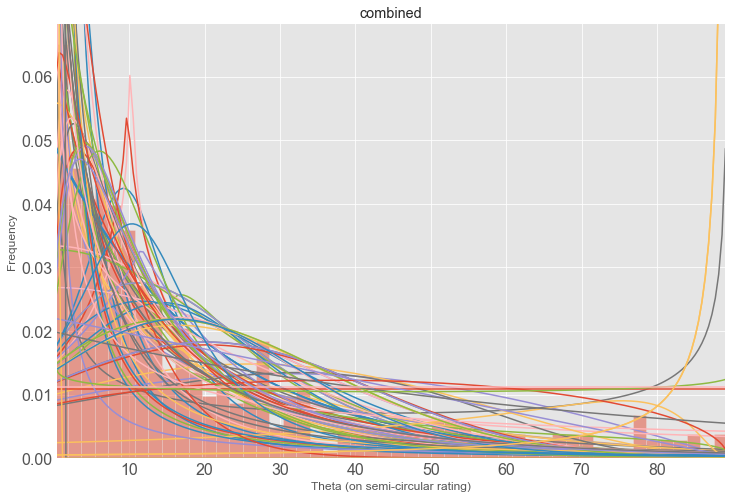

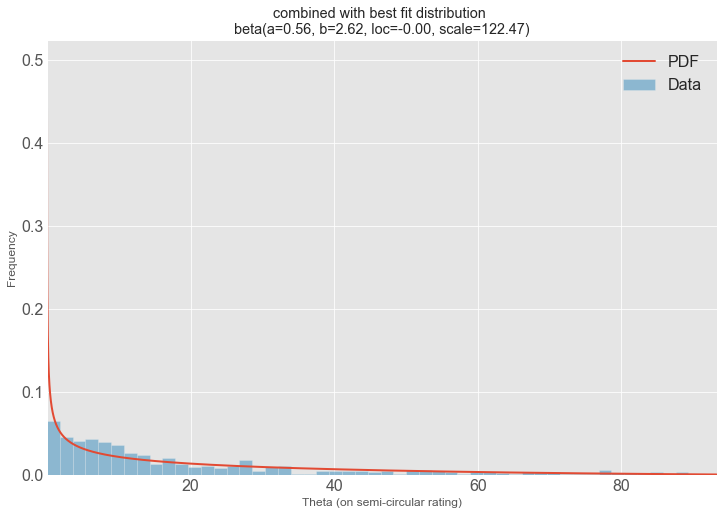

In [34]:
# Plot for comparison
plt.figure(figsize=(12,8))

data = np.degrees(combined['theta'])
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'combined')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'combined with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

## best fit - cognitive

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

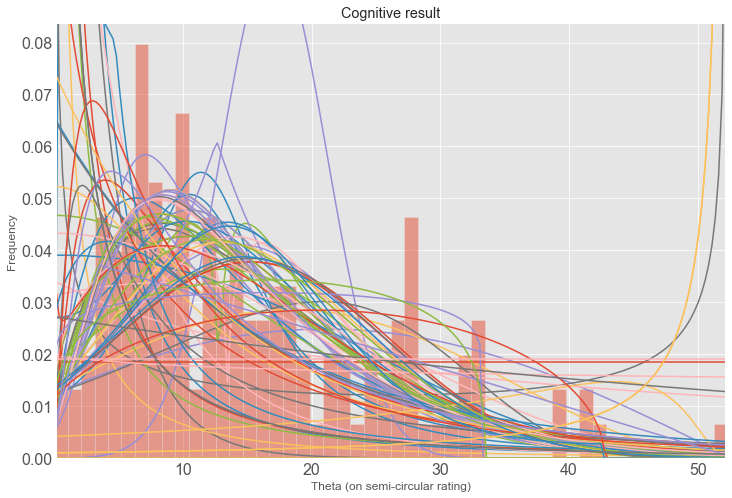

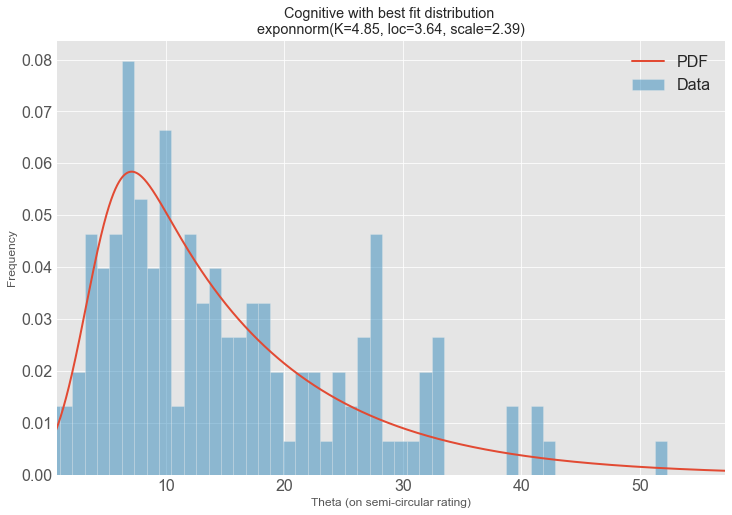

In [43]:
# Plot for comparison
plt.figure(figsize=(12,8))

data = np.degrees(result['theta'])
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Cognitive result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Cognitive with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

### cognitive only 50 degrees

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

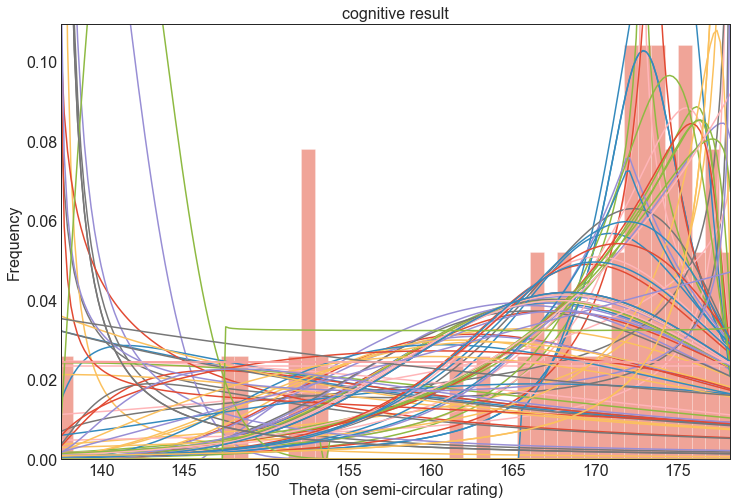

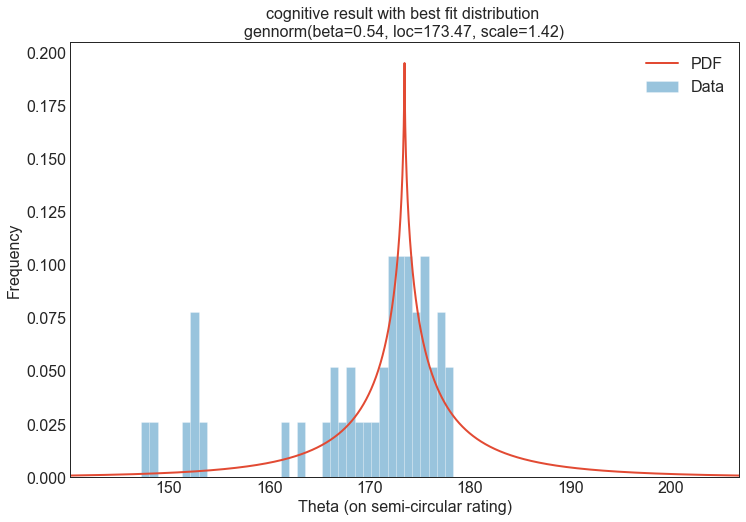

In [711]:
cog50 = np.degrees(cog50_cleaned['theta'][cog50_cleaned['administer'] == 50 ] )
# cog100 = np.degrees(result['theta'][result['administer'] == 100 ] )
# cog150 = np.degrees(result['theta'][result['administer'] == 150 ] )


# Plot for comparison
plt.figure(figsize=(12,8))

data = cog50
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'cognitive result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'cognitive result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

### cognitive only 100 degrees

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

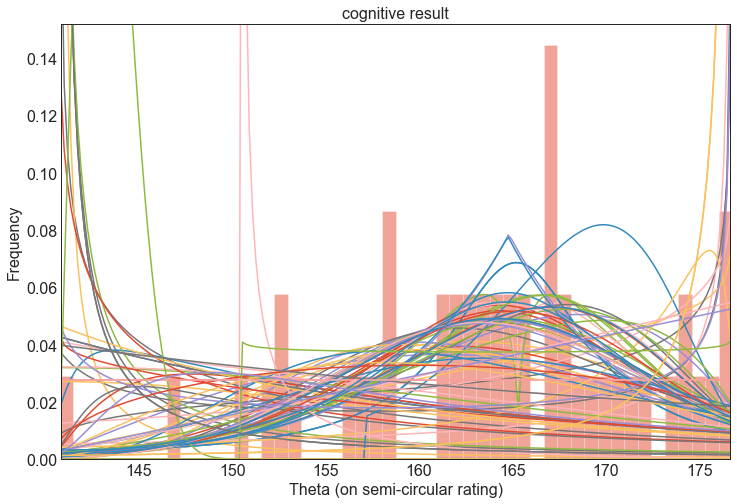

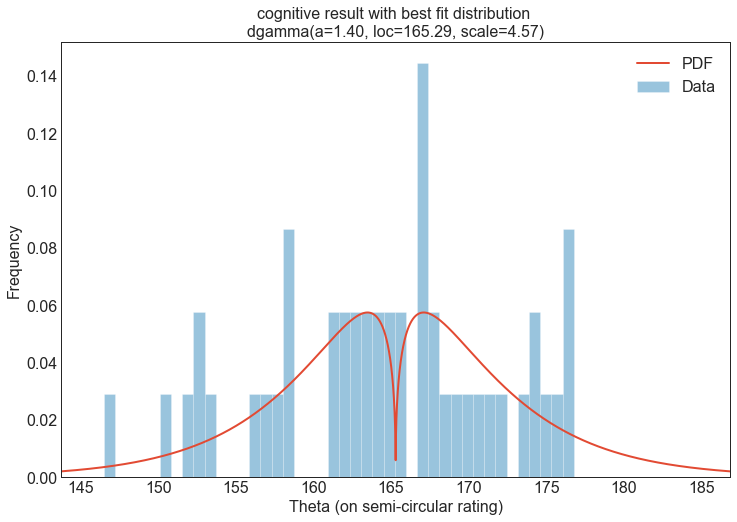

In [717]:
# cog50 = np.degrees(cog50_cleaned['theta'][cog50_cleaned['administer'] == 50 ] )
cog100 = np.degrees(result['theta'][result['administer'] == 100 ] )
# cog150 = np.degrees(result['theta'][result['administer'] == 150 ] )


# Plot for comparison
plt.figure(figsize=(12,8))

data = cog100
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'cognitive result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'cognitive result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

### cognitive only 150 degrees

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

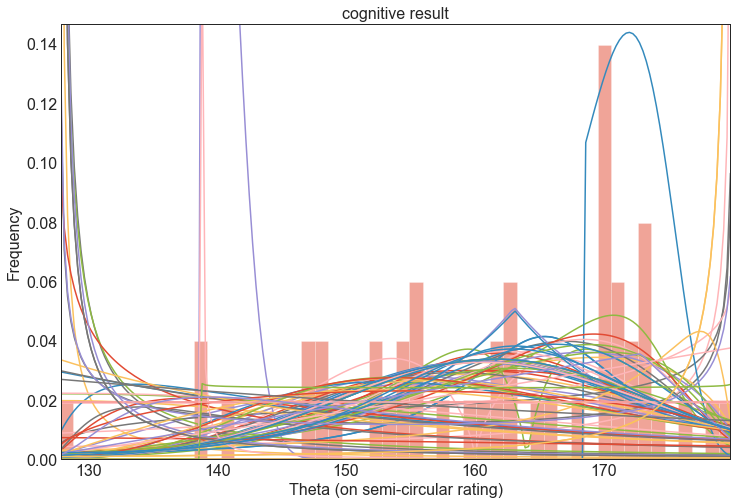

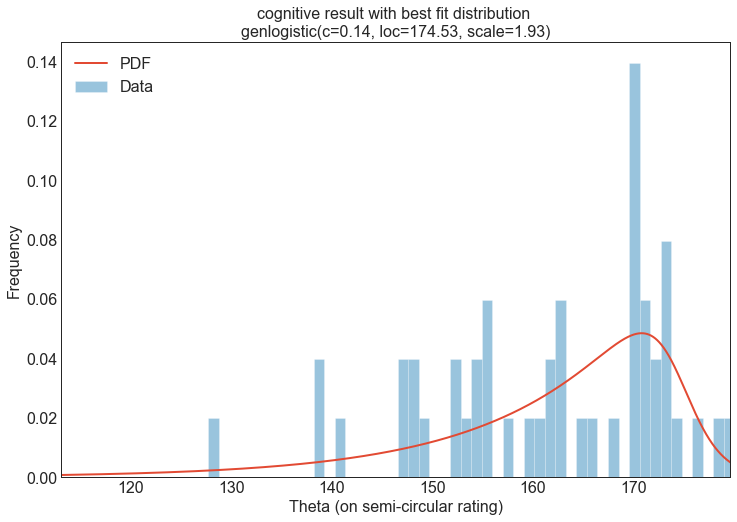

In [719]:
# cog50 = np.degrees(cog50_cleaned['theta'][cog50_cleaned['administer'] == 50 ] )
# cog100 = np.degrees(result['theta'][result['administer'] == 100 ] )
cog150 = np.degrees(result['theta'][result['administer'] == 150 ] )


# Plot for comparison
plt.figure(figsize=(12,8))

data = cog150
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'cognitive result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'cognitive result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

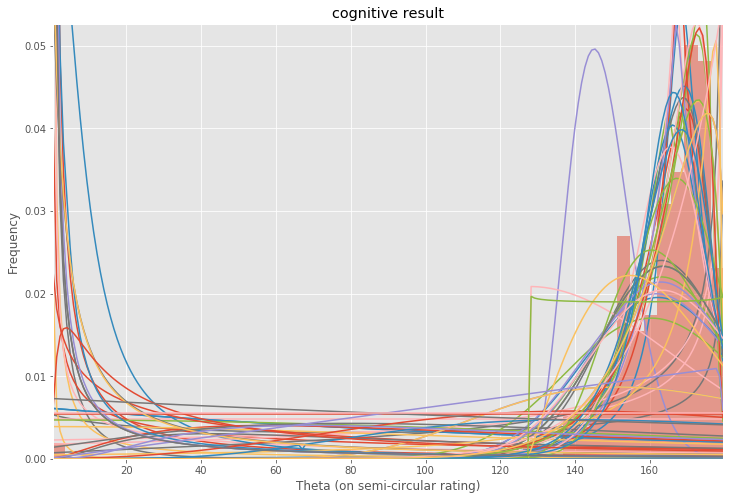

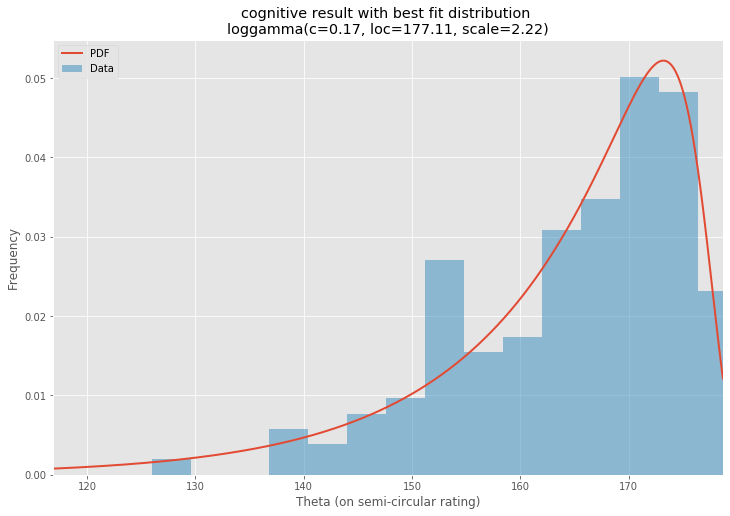

In [45]:
# Plot for comparison
plt.figure(figsize=(12,8))

data = np.degrees(result['theta'])
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'cognitive result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'cognitive result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

## best fit - pain

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

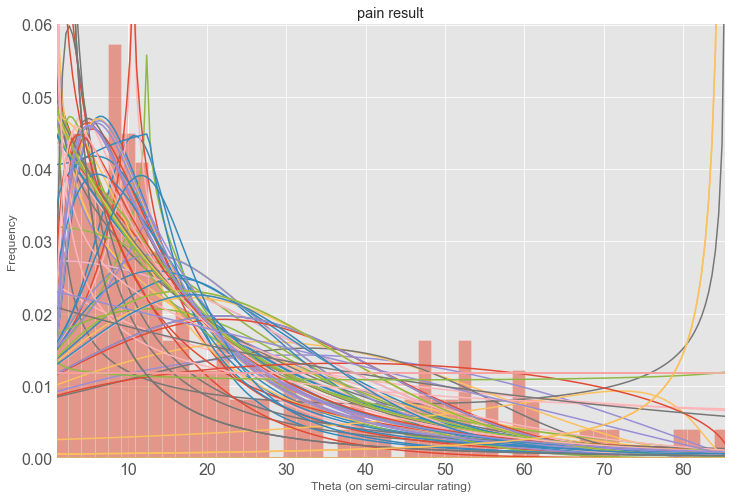

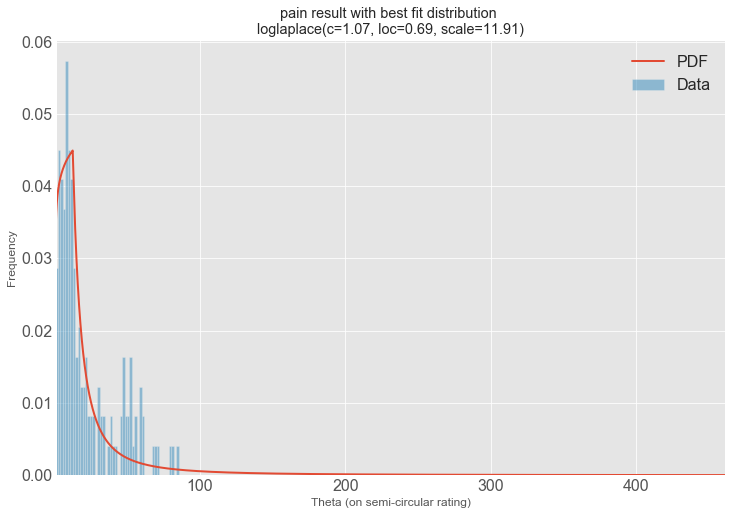

In [48]:
# Plot for comparison
plt.figure(figsize=(12,8))

data = np.degrees(pain_result['theta'])
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'pain result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'pain result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

## best fit - vicarious

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

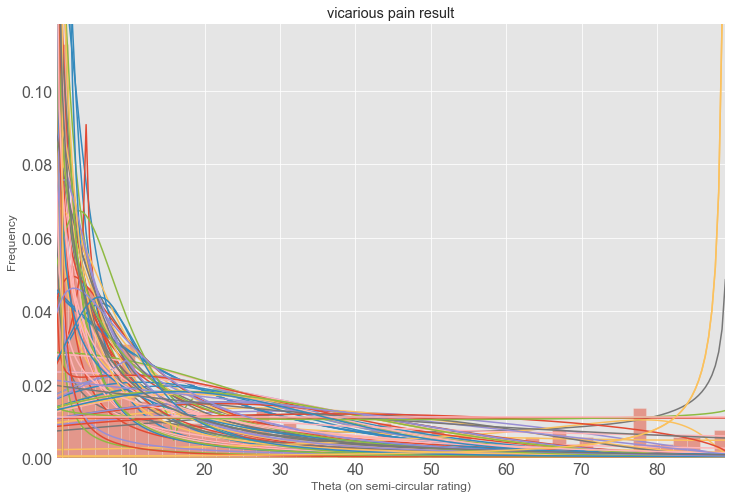

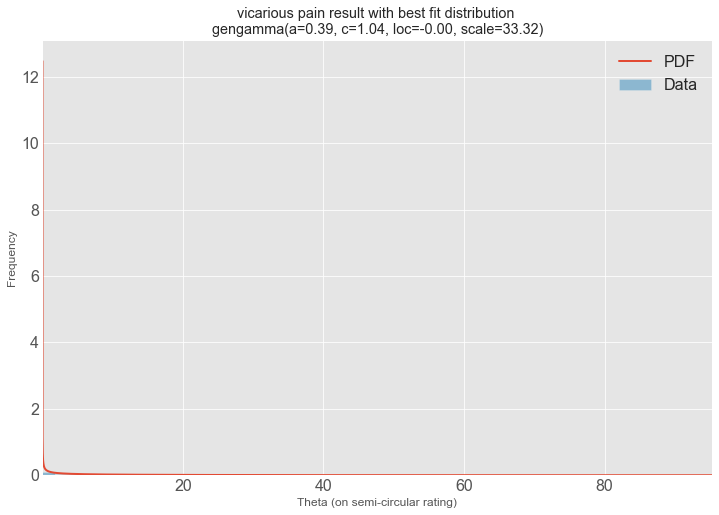

In [50]:
# Plot for comparison
plt.figure(figsize=(12,8))

data = np.degrees(v_result['theta'])
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'vicarious pain result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'vicarious pain result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# [ Beta fitting ]

## all three tasks

/Users/h/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/h/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


<Figure size 1152x864 with 0 Axes>

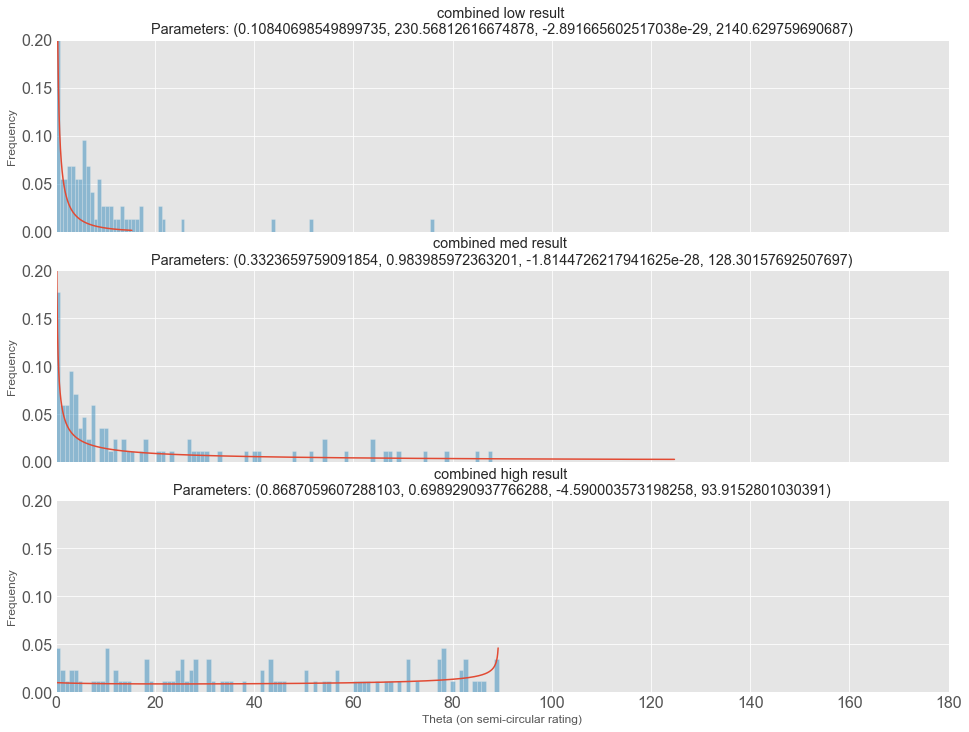

In [21]:
plt.figure()

fig, ax = plt.subplots(3, sharex=True, sharey=True)
level = ['low', 'med', 'high']
dist = st.beta #st.loglaplace
combined_low = np.degrees(combined['theta'][combined['administer'] == 'low' ] )
combined_med = np.degrees(combined['theta'][combined['administer'] == 'med' ] )
combined_high = np.degrees(combined['theta'][combined['administer'] == 'high' ] )
dataframe = [combined_low, combined_med,combined_high]
for ind in range(3):
    y100, x = np.histogram(dataframe[ind], bins=50, density=True)
    x100 = (x + np.roll(x, -1))[:-1] / 2.0
        # fit dist to data
    combined_params = dist.fit( dataframe[ind])
        # Separate parts of parameters
    arg = combined_params[:-2]
    loc = combined_params[-2]
    scale = combined_params[-1]

        # Make PDF with best params
    pdf = make_pdf(dist, combined_params)
        # Display
#     ax[ind] = pdf.plot(lw=2, label='PDF', legend=True)
    ax[ind].plot(pdf)
    ax[ind] = dataframe[ind].plot(kind='hist', bins=100,
                                    normed=True,
                                    alpha=0.5,
                                    label='Data',
                                    legend=False, ax=ax[ind])
    ax[ind].set_title(u'combined ' + str(level[ind]) + ' result \n' +
                     'Parameters: ' + str(combined_params))
    ax[ind].set_xlabel(u'Theta (on semi-circular rating)')
    ax[ind].set_xlim(0, 180)
    ax[ind].set_ylim(0, 0.2)
    ax[ind].set_ylabel('Frequency')
    

# [ Johnsonsu fitting ]

## all three tasks

In [12]:
# cognitive ______________________________________________________________________
sublist = [ 95,96, 97, 99]
main_dir = '/Users/h/Documents/projects_local/social_influence'
cog_df = pd.DataFrame()
cog_result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + \
                    '_task-cognitive_meta_beh.csv'
    cog_df = pd.read_csv(loadfilename, 
                     usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
    cog_df['sub_num'] = sub
    cog_result = pd.concat([cog_result, cog_df], axis = 0, sort = True)
cog_result.loc[cog_result.administer == 50, 'administer'] = 'low'
cog_result.loc[cog_result.administer == 100, 'administer'] = 'med'
cog_result.loc[cog_result.administer == 150, 'administer'] = 'high'

    
# pain _____________________________________________________________________________
sublist = [95, 96, 97, 99]
pain_df = pd.DataFrame()
pain_result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-pain_meta_beh.csv'
    pain_df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
    pain_df['sub_num'] = sub
    pain_result = pd.concat([pain_result, pain_df], axis = 0, sort = True)
pain_result.loc[pain_result.administer == 48, 'administer'] = 'low'
pain_result.loc[pain_result.administer == 49, 'administer'] = 'med'
pain_result.loc[pain_result.administer == 50, 'administer'] = 'high'
    

# vicarious _____________________________________________________________________________
sublist = [95,96,97,99]
v_result = pd.DataFrame()
v_df = pd.DataFrame()

for ind,sub in enumerate(sublist):
    for ver in range(1,3):
        loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-vicarious_' + str(ver) + '_meta_beh.csv'
        v_df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
        v_df['sub_num'] = sub
        v_result = pd.concat([v_result, v_df], axis = 0, sort = False)

# concat all dataframes
combined = pd.concat([cog_result,pain_result,v_result], axis = 0, sort = False)

combined['new_ptb_coord_x'] = combined['ptb_coord_x'] - 720
combined['new_ptb_coord_y'] = abs(combined['ptb_coord_y'] - 615)

combined['r'], combined['theta'] = cart2pol(combined['new_ptb_coord_x'], combined['new_ptb_coord_y'])



<Figure size 1152x864 with 0 Axes>

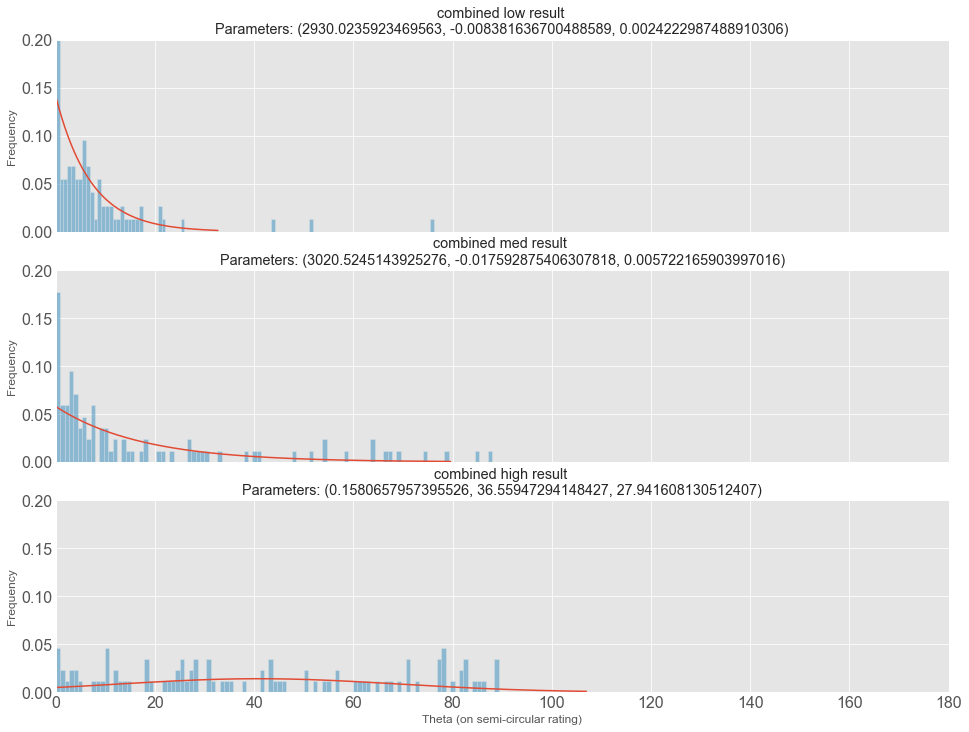

In [65]:
plt.figure()

fig, ax = plt.subplots(3, sharex=True, sharey=True)
level = ['low', 'med', 'high']
dist = st.exponnorm #st.loglaplace
combined_low = np.degrees(combined['theta'][combined['administer'] == 'low' ] )
combined_med = np.degrees(combined['theta'][combined['administer'] == 'med' ] )
combined_high = np.degrees(combined['theta'][combined['administer'] == 'high' ] )
dataframe = [combined_low, combined_med,combined_high]
for ind in range(3):
    y100, x = np.histogram(dataframe[ind], bins=50, density=True)
    x100 = (x + np.roll(x, -1))[:-1] / 2.0
        # fit dist to data
    combined_params = dist.fit( dataframe[ind])
        # Separate parts of parameters
    arg = combined_params[:-2]
    loc = combined_params[-2]
    scale = combined_params[-1]

        # Make PDF with best params
    pdf = make_pdf(dist, combined_params)
        # Display
#     ax[ind] = pdf.plot(lw=2, label='PDF', legend=True)
    ax[ind].plot(pdf)
    ax[ind] = dataframe[ind].plot(kind='hist', bins=100,
                                    normed=True,
                                    alpha=0.5,
                                    label='Data',
                                    legend=False, ax=ax[ind])
    ax[ind].set_title(u'combined ' + str(level[ind]) + ' result \n' +
                     'Parameters: ' + str(combined_params))
    ax[ind].set_xlabel(u'Theta (on semi-circular rating)')
    ax[ind].set_xlim(0, 180)
    ax[ind].set_ylim(0, 0.2)
    ax[ind].set_ylabel('Frequency')
    

## sns plot all three tasks

In [54]:
combined

,administer,cue_type,image_filename,match,p5_responseKey,ptb_coord_x,ptb_coord_y,sub_num,p6_decisionRT,new_ptb_coord_x,new_ptb_coord_y,r,theta
0,50,low,13_50_R.jpg,different,1.0,482.917969,556.742188,95,NaN,237.082031,58.257812,244.134926,0.240954
1,150,low,13_150.jpg,same,2.0,509.277344,515.730469,95,NaN,210.722656,99.269531,232.934492,0.440254
2,50,low,1_50_R.jpg,different,1.0,476.792969,580.289062,95,NaN,243.207031,34.710938,245.671547,0.141764
3,150,high,25_150.jpg,same,2.0,518.460938,484.882812,95,NaN,201.539062,130.117188,239.892635,0.573288
4,150,low,6_150_R.jpg,different,2.0,483.609375,538.406250,95,NaN,236.390625,76.593750,248.489698,0.313339
5,50,high,34_50.jpg,same,2.0,457.996094,585.289062,95,NaN,262.003906,29.710938,263.683118,0.112916
6,50,high,3_50.jpg,same,2.0,467.902344,595.285156,95,NaN,252.097656,19.714844,252.867363,0.078044
7,50,high,11_50.jpg,same,2.0,469.359375,603.027344,95,NaN,250.640625,11.972656,250.926418,0.047732
8,150,low,8_150_R.jpg,different,1.0,533.718750,461.355469,95,NaN,186.281250,153.644531,241.469141,0.689680
9,100,low,8_100.jpg,same,2.0,465.414062,599.722656,95,NaN,254.585938,15.277344,255.043912,0.059937


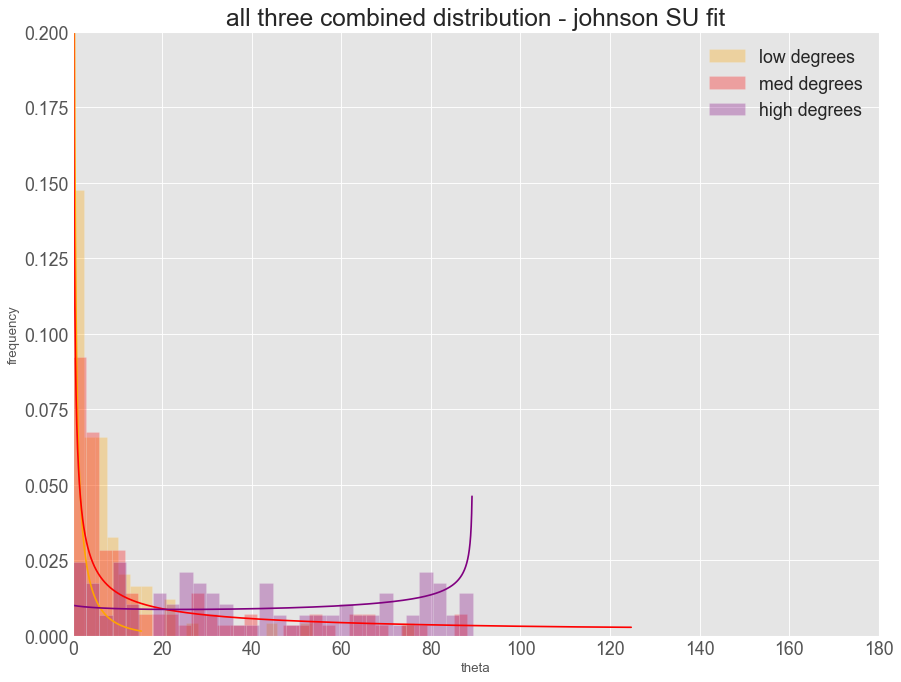

In [73]:

plt.figure(figsize=(13,10), dpi= 80)
level = ['low', 'med', 'high']
dist = st.beta
c = [ "orange", "red", "purple"]
# c = ["g", "orange", "red"]
combined_low = np.degrees(combined['theta'][combined['administer'] == 'low' ] )
combined_med = np.degrees(combined['theta'][combined['administer'] == 'med' ] )
combined_high = np.degrees(combined['theta'][combined['administer'] == 'high' ] )
dataframe = [combined_low, combined_med,combined_high]

for ind in range(3):
#     cog = result[result['administer'] == level[ind]]
    cog_params = dist.fit(dataframe[ind] )
        # Separate parts of parameters
    arg = cog_params[:-2]
    loc = cog_params[-2]
    scale = cog_params[-1]

        # Make PDF with best params
    size = 100
    x = 200
    pdf_fitted = make_pdf(dist, cog_params)
    pdf = pdf_fitted.to_frame()
    pdf.reset_index(inplace= True)
    pdf.rename(columns={ pdf.columns[0]: "x",   pdf.columns[1]: "y"}, inplace = True)
    sns.lineplot(pdf['x'], pdf['y'],  color=c[ind], sizes=(3))
    sns.distplot(dataframe[ind], norm_hist = True, color=c[ind], label=str(level[ind])+" degrees", kde=False, hist_kws={'alpha':.3}, bins=30) #, hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    plt.title('all three combined distribution - johnson SU fit', fontsize=22)
    plt.legend()
    plt.ylabel("frequency")
    plt.xlim(0, 180)
    plt.ylim(0,0.2)
plt.show()

In [26]:
combined_params

(6.064444072172332,
 1.0514702513247631,
 183.13906303642042,
 0.17941739969742476)

## cognitive

In [66]:
#sub_num = 99, index 0, image_filename, 13_50_R.jpg
cog50_data = result[result['administer'] == 50 ] 
cog50_data.reset_index(drop=True, inplace = True)
ind = cog50_data.loc[np.degrees(cog50_data.theta) ==0.000000, ]
cog50_cleaned = cog50_data.drop( list(ind.index) )

<Figure size 1152x864 with 0 Axes>

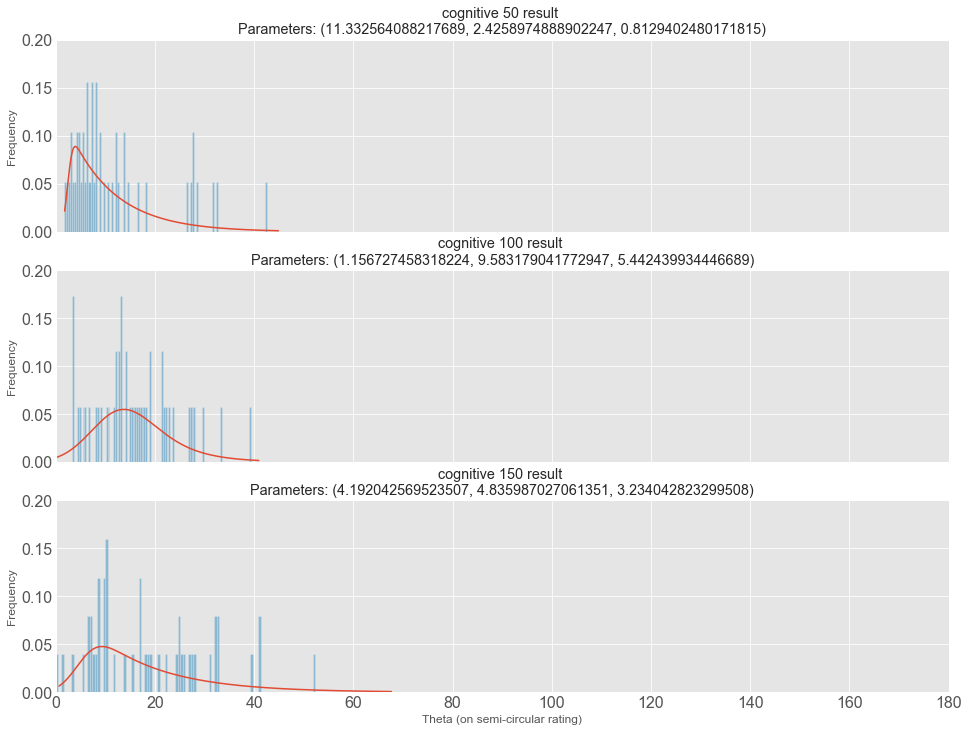

In [67]:
plt.figure()

fig, ax = plt.subplots(3, sharex=True, sharey=True)
cog = [50, 100, 150]
dist = st.exponnorm #st.loglaplace
# cog50_cleaned
# cog50 = pain_result[pain_result['administer'] == temp[ind]]
cog50 = np.degrees(cog50_cleaned['theta'][cog50_cleaned['administer'] == 50 ] )
cog100 = np.degrees(result['theta'][result['administer'] == 100 ] )
cog150 = np.degrees(result['theta'][result['administer'] == 150 ] )
dataframe = [cog50, cog100,cog150]
for ind in range(3):
    y100, x = np.histogram(dataframe[ind], bins=50, density=True)
    x100 = (x + np.roll(x, -1))[:-1] / 2.0
        # fit dist to data
    cog_params = dist.fit( dataframe[ind])
        # Separate parts of parameters
    arg = cog_params[:-2]
    loc = cog_params[-2]
    scale = cog_params[-1]

        # Make PDF with best params
    pdf = make_pdf(dist, cog_params)
        # Display
#     ax[ind] = pdf.plot(lw=2, label='PDF', legend=True)
    ax[ind].plot(pdf)
    ax[ind] = dataframe[ind].plot(kind='hist', bins=100,
                                    normed=True,
                                    alpha=0.5,
                                    label='Data',
                                    legend=False, ax=ax[ind])
    ax[ind].set_title(u'cognitive ' + str(cog[ind]) + ' result \n' +
                     'Parameters: ' + str(cog_params))
    ax[ind].set_xlabel(u'Theta (on semi-circular rating)')
    ax[ind].set_xlim(0, 180)
    ax[ind].set_ylim(0, 0.2)
    ax[ind].set_ylabel('Frequency')
    

### sns plot cognitive

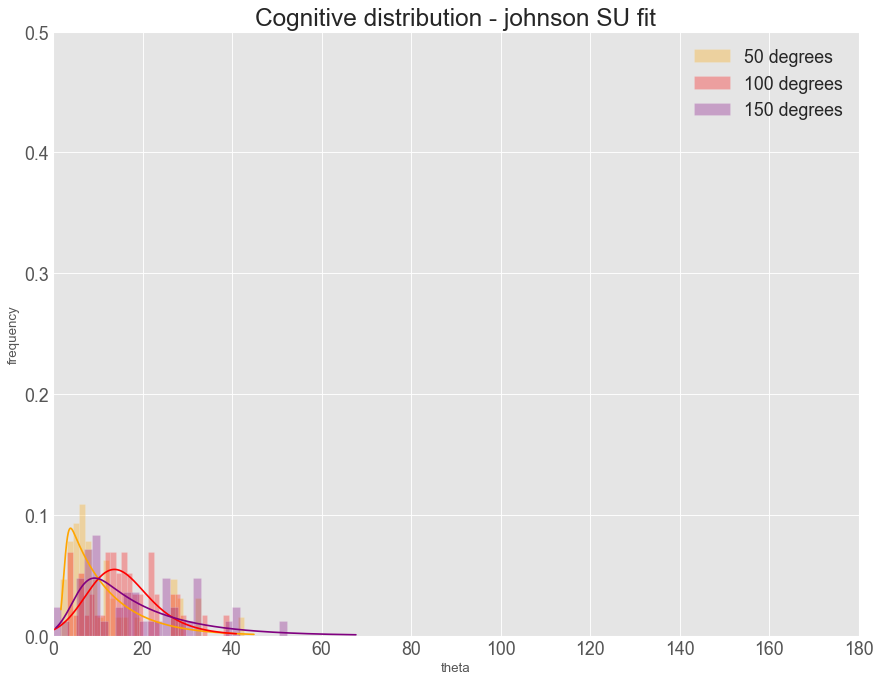

In [69]:
dist = st.exponnorm #st.loggamma
plt.figure(figsize=(13,10), dpi= 80)
level = [50,100,150]
c = [ "orange", "red", "purple"]
# c = ["g", "orange", "red"]
cog50 = np.degrees(cog50_cleaned['theta'][cog50_cleaned['administer'] == 50 ] )
cog100 = np.degrees(result['theta'][result['administer'] == 100 ] )
cog150 = np.degrees(result['theta'][result['administer'] == 150 ] )
dataframe = [cog50, cog100,cog150]

for ind in range(3):
#     cog = result[result['administer'] == level[ind]]
    cog_params = dist.fit(dataframe[ind] )
        # Separate parts of parameters
    arg = cog_params[:-2]
    loc = cog_params[-2]
    scale = cog_params[-1]

        # Make PDF with best params
    size = 100
    x = 200
    pdf_fitted = make_pdf(dist, cog_params)
    pdf = pdf_fitted.to_frame()
    pdf.reset_index(inplace= True)
    pdf.rename(columns={ pdf.columns[0]: "x",   pdf.columns[1]: "y"}, inplace = True)
    sns.lineplot(pdf['x'], pdf['y'],  color=c[ind], sizes=(3))
    sns.distplot(dataframe[ind], norm_hist = True, color=c[ind], label=str(level[ind])+" degrees", kde=False, hist_kws={'alpha':.3}, bins=30) #, hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    plt.title('Cognitive distribution - exponnorm fit', fontsize=22)
    plt.legend()
    plt.ylabel("frequency")
    plt.xlim(0, 180)
    plt.ylim(0, 0.5)
plt.show()

## pain

###  plot 3 different pain levels

<Figure size 6000x6000 with 0 Axes>

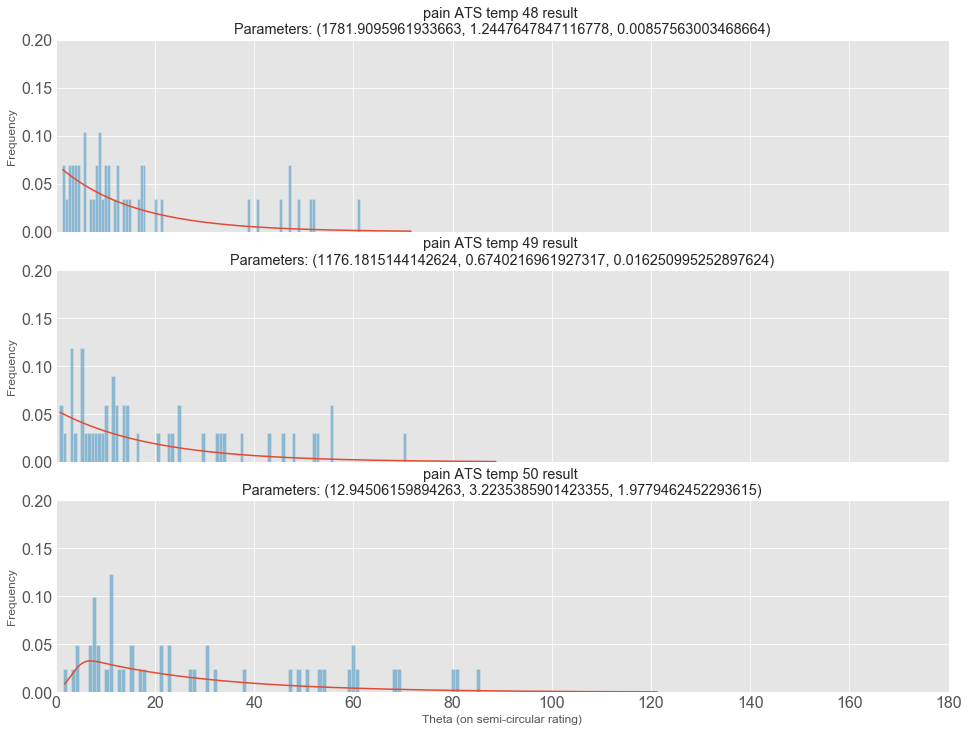

In [70]:
plt.figure(figsize=(20, 20), dpi= 300)

fig, ax = plt.subplots(3, sharex=True, sharey=True)
temp = [48, 49, 50]
dist = st.exponnorm
for ind in range(3):
    # fig, ax = plt.subplots(3,1)
    pain = pain_result[pain_result['administer'] == temp[ind]]

    y100, x = np.histogram(np.degrees(pain.theta), bins=100, density=True)
    x100 = (x + np.roll(x, -1))[:-1] / 2.0
        # fit dist to data
    pain_params = dist.fit( np.degrees(pain.theta) )
        # Separate parts of parameters
    arg = pain_params[:-2]
    loc = pain_params[-2]
    scale = pain_params[-1]

        # Make PDF with best params
    pdf = make_pdf(dist, pain_params)

        # Display
#     ax[ind] = pdf.plot(lw=2, label='PDF', legend=True)
    ax[ind].plot(pdf)
    ax[ind] = np.degrees(pain.theta).plot(kind='hist', bins=100,
                                    normed=True,
                                    alpha=0.5,
                                    legend=False, ax=ax[ind])
    ax[ind].set_title(u'pain ATS temp ' + str(temp[ind]) + ' result \n' +
                     'Parameters: ' + str(pain_params))
    ax[ind].set_xlabel(u'Theta (on semi-circular rating)')
    ax[ind].set_xlim(0, 180)
    ax[ind].set_ylim(0, 0.2)
    ax[ind].set_ylabel('Frequency')
    

### Pain - same plot (seaborn version)

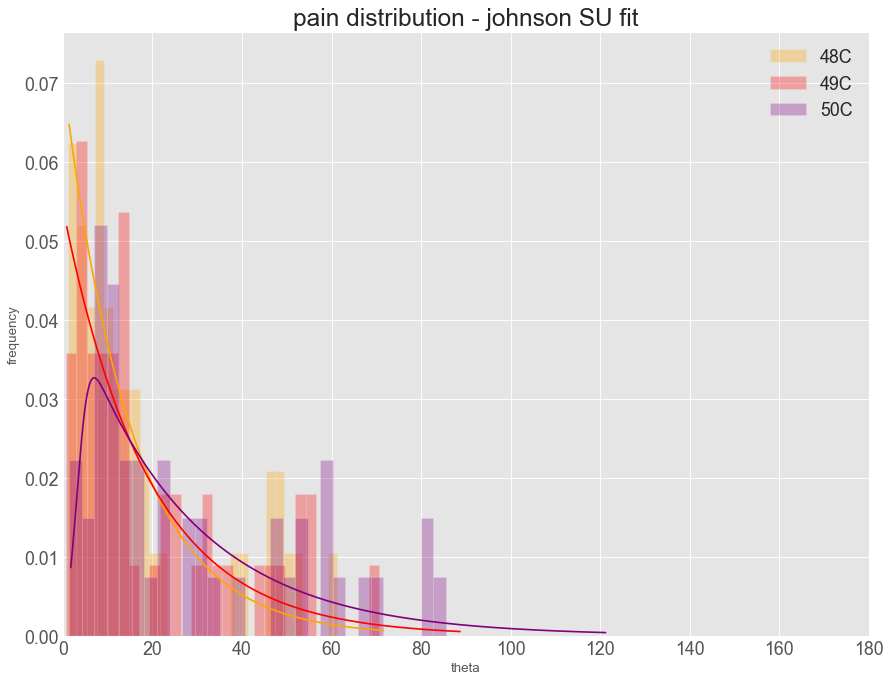

In [71]:
dist = st.exponnorm

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)

temp = [48, 49, 50]
c = [ "orange", "red", "purple"]
# c = ["g", "orange", "red"]
for ind in range(3):
    pain = pain_result[pain_result['administer'] == temp[ind]]
    pain_params = dist.fit( np.degrees(pain.theta) )
        # Separate parts of parameters
    arg = pain_params[:-2]
    loc = pain_params[-2]
    scale = pain_params[-1]

    size = 100
    x = 200
    pdf_fitted = make_pdf(dist, pain_params)
    pdf = pdf_fitted.to_frame()
    pdf.reset_index(inplace= True)
    pdf.rename(columns={ pdf.columns[0]: "x",   pdf.columns[1]: "y"}, inplace = True)
    sns.lineplot(pdf['x'], pdf['y'],  color=c[ind], sizes=(3))
    sns.distplot(np.degrees(pain_result.loc[pain_result['administer'] == temp[ind], "theta"]), 
                 norm_hist = True, 
                 color=c[ind], 
                 label=str(temp[ind])+"C", 
                 kde=False, 
                 hist_kws={'alpha':.3}, 
                 bins=30) 
    plt.title('pain distribution - exponnorm fit', fontsize=22)
    plt.legend()
    plt.ylabel("frequency")
    plt.xlim(0, 180)
plt.show()

## vicarious

<Figure size 1152x864 with 0 Axes>

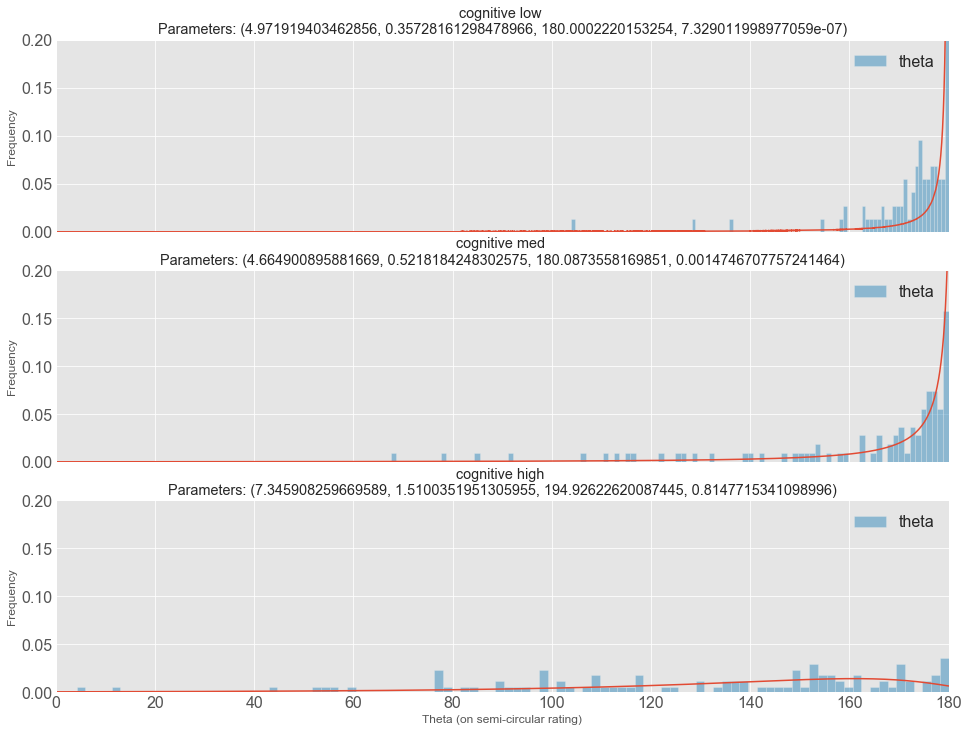

In [27]:
plt.figure()

fig, ax = plt.subplots(3, sharex=True, sharey=True)
level = ['low', 'med', 'high']
dist = johnsonsu

for ind in range(3):
    data = np.degrees(v_result['theta'][v_result['administer'] == level[ind] ])
    y100, x = np.histogram(data, bins=50, density=True)
    x100 = (x + np.roll(x, -1))[:-1] / 2.0
        # fit dist to data
    v_params = dist.fit( data)
        # Separate parts of parameters
    arg = v_params[:-2]
    loc = v_params[-2]
    scale = v_params[-1]

        # Make PDF with best params
    pdf = make_pdf(dist, v_params)
    ax[ind].plot(pdf)
    ax[ind] = data.plot(kind='hist', bins=100,
                                    normed=True,
                                    alpha=0.5,
                                    legend=True, ax=ax[ind])
    ax[ind].set_title(u'cognitive ' + str(level[ind]) + ' \n' +
                     'Parameters: ' + str(v_params))
    ax[ind].set_xlabel(u'Theta (on semi-circular rating)')
    ax[ind].set_xlim(0, 180)
    ax[ind].set_ylim(0, 0.2)
    ax[ind].set_ylabel('Frequency')
    

### vicarious plot ver 2. seaborn

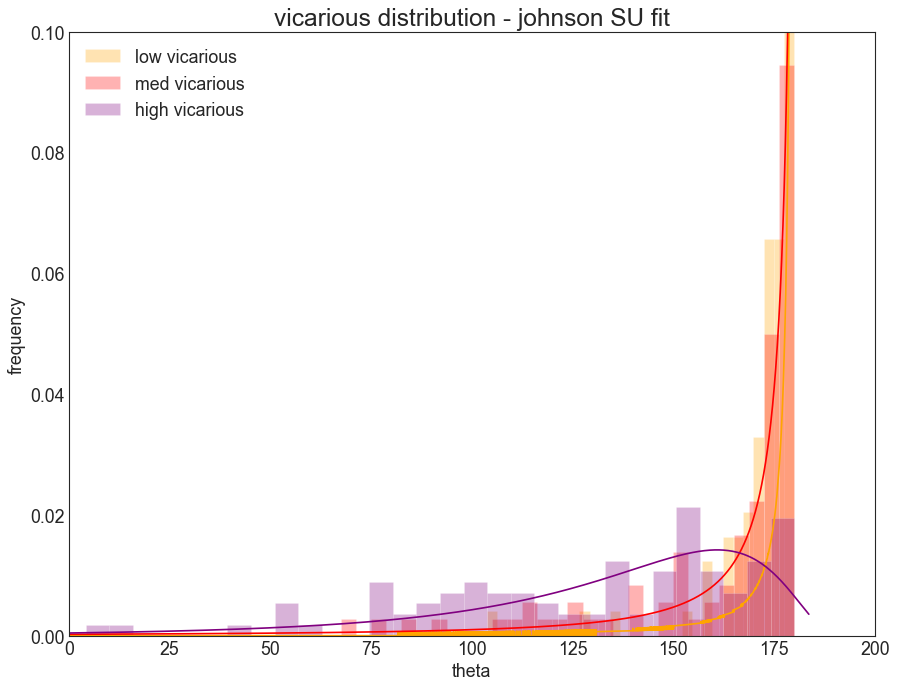

In [694]:

dist = johnsonsu
plt.figure(figsize=(13,10), dpi= 80)

level = ['low', 'med', 'high']
c = [ "orange", "red", "purple"]
# c = ["g", "orange", "red"]
for ind in range(3):
    v = v_result[v_result['administer'] == level[ind]] 
    v_params = dist.fit( np.degrees(v.theta) )
        # Separate parts of parameters
    arg = v_params[:-2]
    loc = v_params[-2]
    scale = v_params[-1]

        # Make PDF with best params
    size = 100
    x = 200
    pdf_fitted = make_pdf(dist, v_params)
    pdf = pdf_fitted.to_frame()
    pdf.reset_index(inplace= True)
    pdf.rename(columns={ pdf.columns[0]: "x",   pdf.columns[1]: "y"}, inplace = True)
    sns.lineplot(pdf['x'], pdf['y'],  color=c[ind], sizes=(3))
    sns.distplot(np.degrees(v.theta), 
                 norm_hist = True, color=c[ind], 
                 label=str(level[ind])+" vicarious", 
                 kde=False, hist_kws={'alpha':.3}, bins=30) #, hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
#     sns.distplot(pdf, hist=False, color = c[ind]);
    plt.title('vicarious distribution - johnson SU fit', fontsize=22)
    plt.legend()
    plt.ylabel("frequency")
    plt.xlim(0, 200)
    plt.ylim(0,0.1)
plt.show()